In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/INFO555/Project2/v3/annotation_data.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.head())
print(df.shape)
print(df.info())

   Sr                                           Sentence Annotation1  \
0   1  The gentle hum of the coffee shop brought a st...    Positive   
1   2  The presentation left everyone in awe, though ...    Positive   
2   3  She walked into the room, and an undeniable ai...    Positive   
3   4  The warmth of the sunlight filtering through t...    Positive   
4   5  Though the journey was exhausting, something a...    Positive   

  Annotation2   Category  isSame  
0    Positive  Sentiment    True  
1    Positive  Sentiment    True  
2    Positive  Sentiment    True  
3    Positive  Sentiment    True  
4    Positive  Sentiment    True  
(250, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sr           250 non-null    int64 
 1   Sentence     250 non-null    object
 2   Annotation1  250 non-null    object
 3   Annotation2  250 non-null    objec

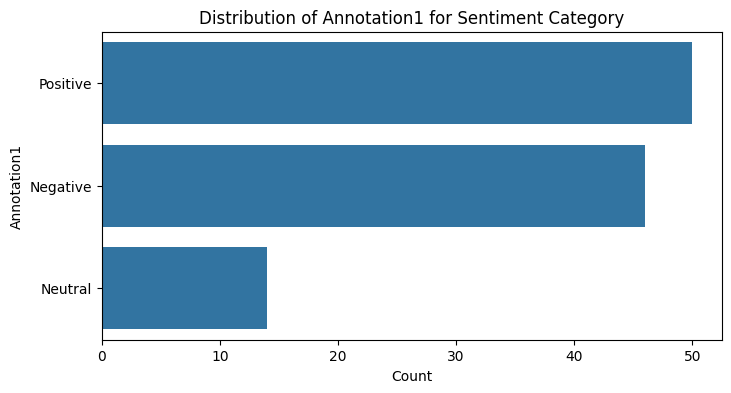

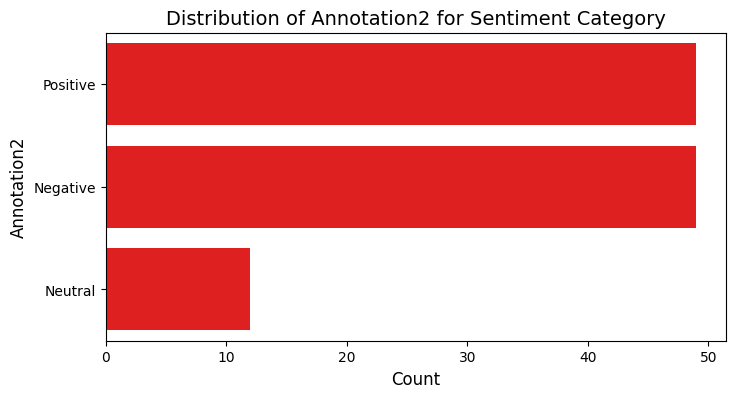

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sentiment_data = df[df['Category'] == 'Sentiment']
sns.countplot(y='Annotation1', data=sentiment_data, order=sentiment_data['Annotation1'].value_counts().index)
plt.title("Distribution of Annotation1 for Sentiment Category")
plt.xlabel("Count")
plt.ylabel("Annotation1")
plt.show()

plt.figure(figsize=(8, 4))
sentiment_data = df[df['Category'] == 'Sentiment']
sns.countplot(
    y='Annotation2',
    data=sentiment_data,
    order=sentiment_data['Annotation2'].value_counts().index,
    color='red'
)
plt.title("Distribution of Annotation2 for Sentiment Category", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Annotation2", fontsize=12)
plt.show()

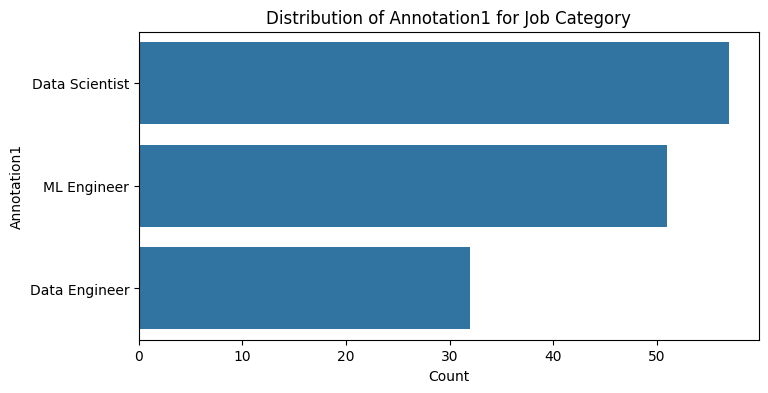

In [ ]:
plt.figure(figsize=(8, 4))
job_data = df[df['Category'] == 'Job Role']
sns.countplot(y='Annotation1', data=job_data, order=job_data['Annotation1'].value_counts().index)
plt.title("Distribution of Annotation1 for Job Category")
plt.xlabel("Count")
plt.ylabel("Annotation1")
plt.show()

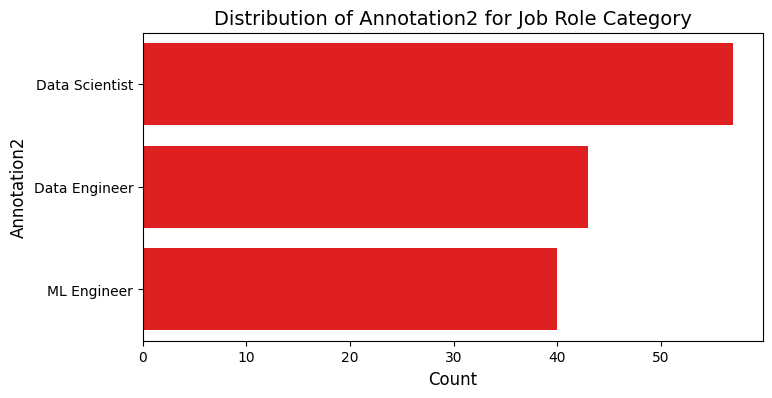

In [ ]:
plt.figure(figsize=(8, 4))
job_data = df[df['Category'] == 'Job Role']
sns.countplot(
    y='Annotation2',
    data=job_data,
    order=job_data['Annotation2'].value_counts().index,
    color='red'
)
plt.title("Distribution of Annotation2 for Job Role Category", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Annotation2", fontsize=12)
plt.show()

<ipython-input-12-8eddc95523af>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='isSame', data=job_data, palette='Set2')


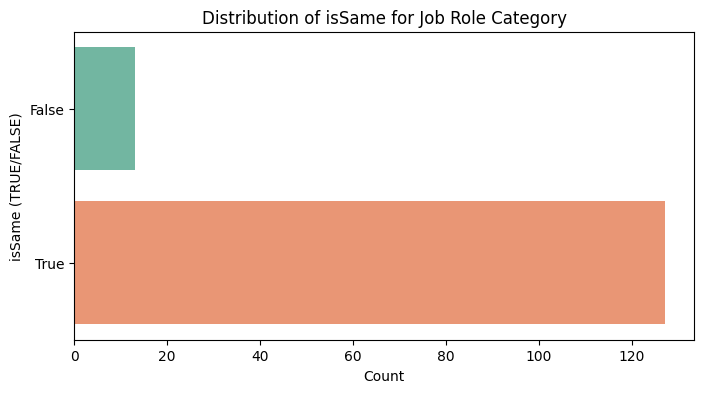

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(y='isSame', data=job_data, palette='Set2')
plt.title("Distribution of isSame for Job Role Category")
plt.xlabel("Count")
plt.ylabel("isSame (TRUE/FALSE)")
plt.show()

<ipython-input-13-89caca817b85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='isSame', data=sentiment_data, palette='Set2')


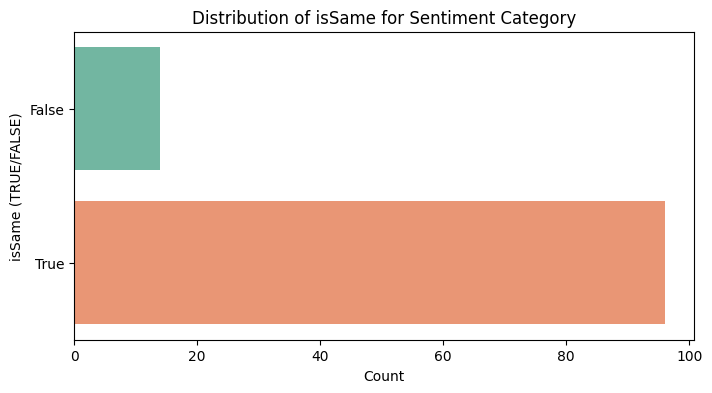

In [ ]:
plt.figure(figsize=(8, 4))
sentiment_data = df[df['Category'] == 'Sentiment']
sns.countplot(y='isSame', data=sentiment_data, palette='Set2')
plt.title("Distribution of isSame for Sentiment Category")
plt.xlabel("Count")
plt.ylabel("isSame (TRUE/FALSE)")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(data, title):
    text = " ".join(data)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

positive_sentiment = df[(df['Category'] == 'Sentiment') &
                        (df['Annotation1'] == 'Positive') &
                        (df['Annotation2'] == 'Positive')]['Sentence']

negative_sentiment = df[(df['Category'] == 'Sentiment') &
                        (df['Annotation1'] == 'Negative') &
                        (df['Annotation2'] == 'Negative')]['Sentence']

neutral_sentiment = df[(df['Category'] == 'Sentiment') &
                       (df['Annotation1'] == 'Neutral') &
                       (df['Annotation2'] == 'Neutral')]['Sentence']

job_role_ds = df[(df['Category'] == 'Job Role') &
                 (df['Annotation1'] == 'Data Scientist') &
                 (df['Annotation2'] == 'Data Scientist')]['Sentence']

job_role_mle = df[(df['Category'] == 'Job Role') &
                  (df['Annotation1'] == 'ML Engineer') &
                  (df['Annotation2'] == 'ML Engineer')]['Sentence']

job_role_de = df[(df['Category'] == 'Job Role') &
                 (df['Annotation1'] == 'Data Engineer') &
                 (df['Annotation2'] == 'Data Engineer')]['Sentence']

generate_wordcloud(positive_sentiment, "Positive Sentiments")
generate_wordcloud(negative_sentiment, "Negative Sentiments")
generate_wordcloud(neutral_sentiment, "Neutral Sentiments")

generate_wordcloud(job_role_ds, "Data Scientist Key Words")
generate_wordcloud(job_role_mle, "ML Engineer Key Words")
generate_wordcloud(job_role_de, "Data Engineer Key Words")